In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, fbeta_score
from sklearn.model_selection import GridSearchCV

1.DATA LOADING AND CLEANING

In [2]:
#Load Dataset
df = pd.read_csv("C:\\Users\\sathw\\Downloads\\train_test_dataset.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())

   S.No.  Temperature_K  Luminosity_Lo  Radius_Ro  Absolute_Magnitude  \
0      1       5132.872          1.159      1.084               6.011   
1      2       9295.788          0.013      0.009              14.534   
2      3       5813.333          0.786      0.840               4.883   
3      4       5377.994         -0.070      0.811               5.598   
4      5       5473.370          1.055      0.655               5.376   

        Star_Color Spectral_Class  Star_Type  
0  Yellowish White              A          3  
1            White              D          2  
2       Blue White              G          3  
3            White              F          3  
4  Yellowish White              G          3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.No.               5000 non-null   int64  
 1   Temperature_K       4

In [3]:
#Drop Serial Number
df.drop('S.No.', axis=1, inplace=True)

In [4]:
#Handle Missing Values
df['Spectral_Class'] = df['Spectral_Class'].fillna(df['Spectral_Class'].mode()[0])
df['Temperature_K'] = df['Temperature_K'].fillna(df['Temperature_K'].median())
df['Star_Color'] = df['Star_Color'].fillna(df['Star_Color'].mode()[0])


2.EXPLORATORY DATA ANALYSIS AND FEATURE IMPORTANCE

(a)Exploratory Data Analysis

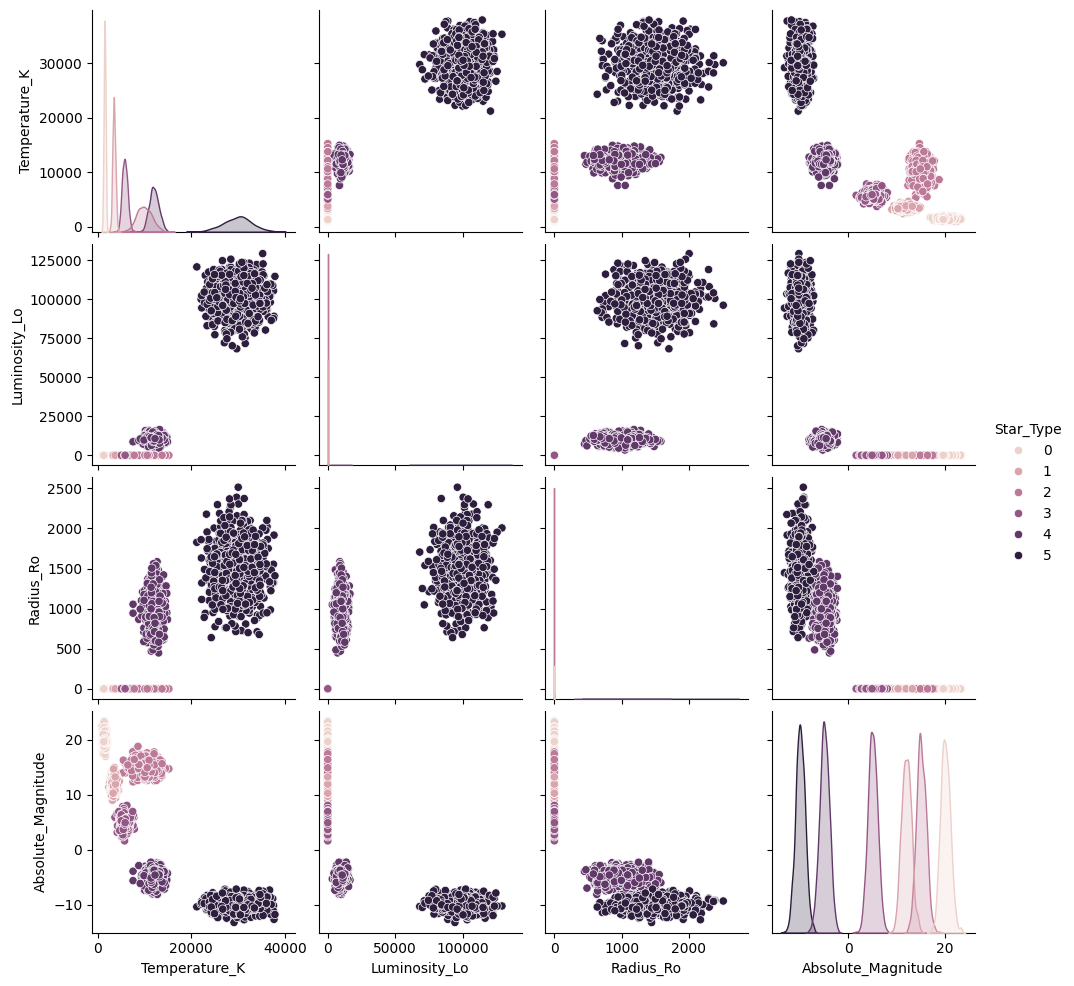

In [5]:
#(i)Pairplots
sns.pairplot(df, hue="Star_Type")

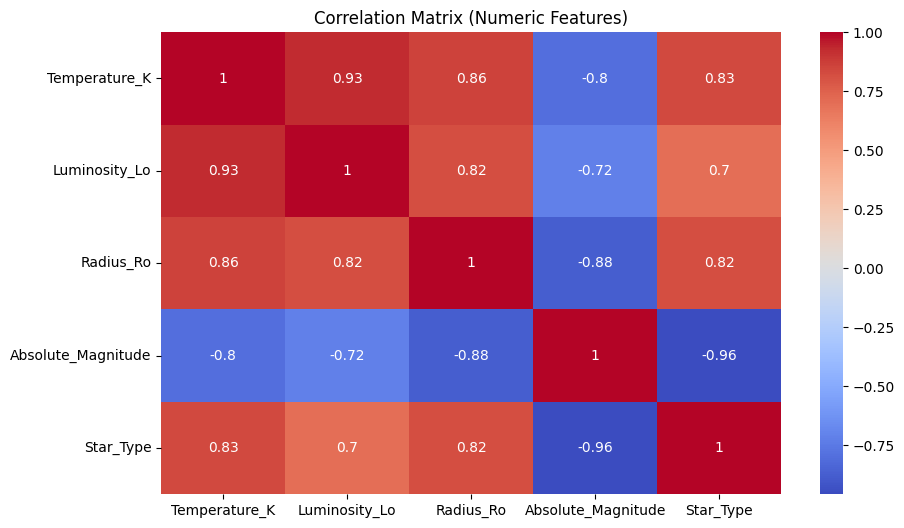

In [6]:
#(ii)Correlation HeatMap
plt.figure(figsize=(10,6))

# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Now compute correlation
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.title("Correlation Matrix (Numeric Features)")
plt.show()


<Axes: xlabel='Star_Type', ylabel='Temperature_K'>

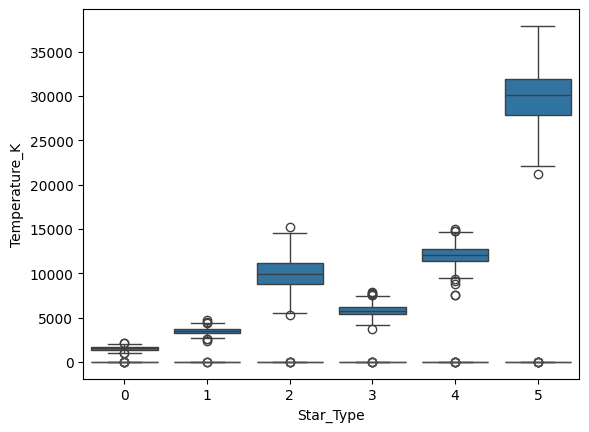

In [7]:
#(iii)BoxPlots
sns.boxplot(x='Star_Type', y='Temperature_K', data=df)
sns.boxplot(x='Star_Type', y='Absolute_Magnitude', data=df)

(b)Feature Importance

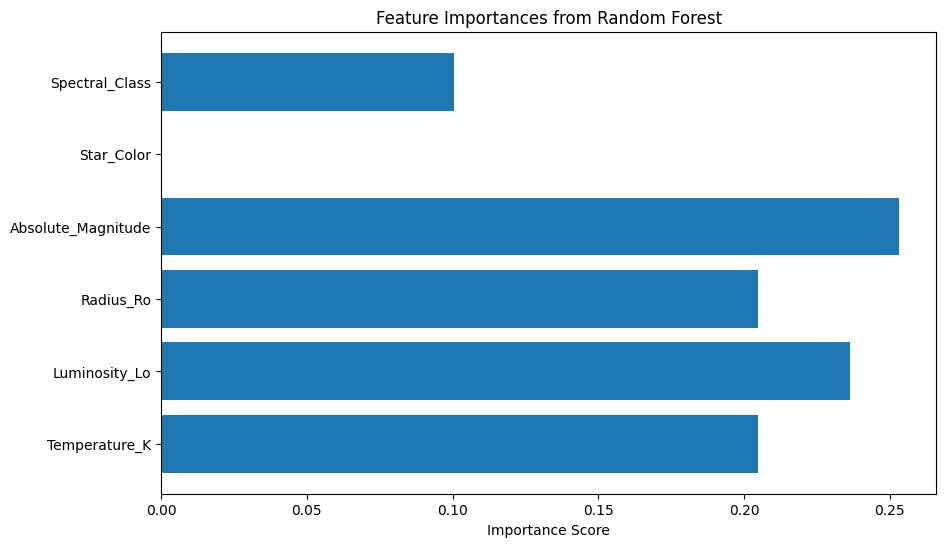

In [8]:

#Features and target
X = df.drop("Star_Type", axis=1)
y = df["Star_Type"]

# Encode categorical features
le_color = LabelEncoder()
le_spectral = LabelEncoder()
X["Star_Color"] = le_color.fit_transform(X["Star_Color"])
X["Spectral_Class"] = le_spectral.fit_transform(X["Spectral_Class"])

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
features = X.columns

#Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importances from Random Forest")
plt.show()


(c) Interpretability (Using SHAP)

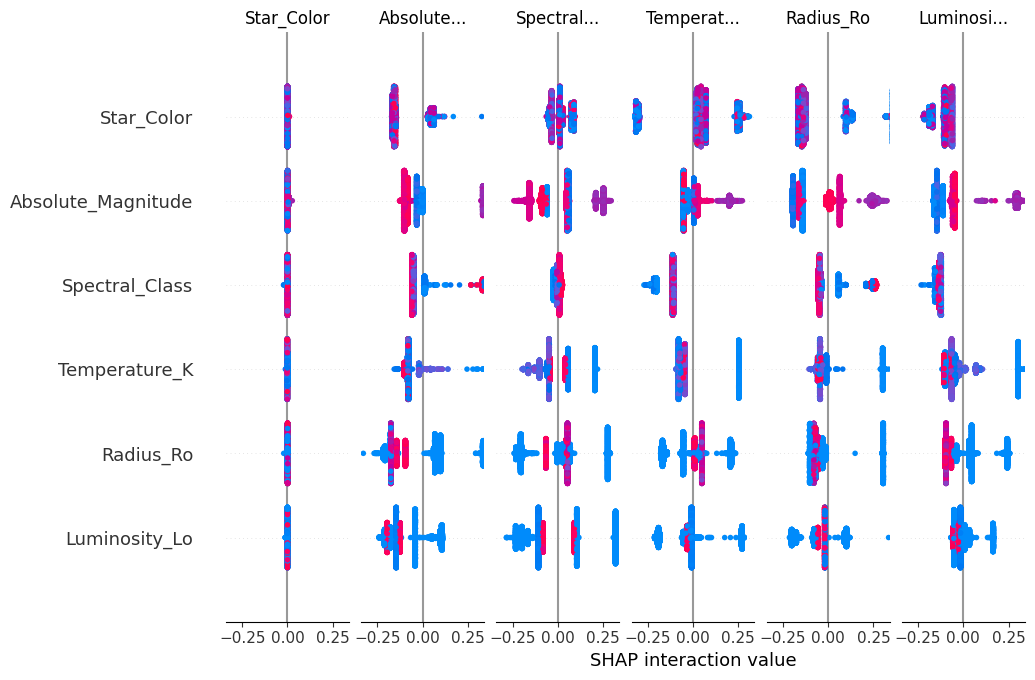

In [9]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)


3.PREPROCESSING & MODEL EVALUATION

In [10]:
# Split features and target
X = df.drop('Star_Type', axis=1)
y = df['Star_Type']

# Label Encode categorical features
le_color = LabelEncoder()
X['Star_Color'] = le_color.fit_transform(X['Star_Color'])

le_spectral = LabelEncoder()
X['Spectral_Class'] = le_spectral.fit_transform(X['Spectral_Class'])

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       157
           2       1.00      1.00      1.00       163
           3       1.00      1.00      1.00       169
           4       1.00      1.00      1.00       176
           5       1.00      1.00      1.00       170

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



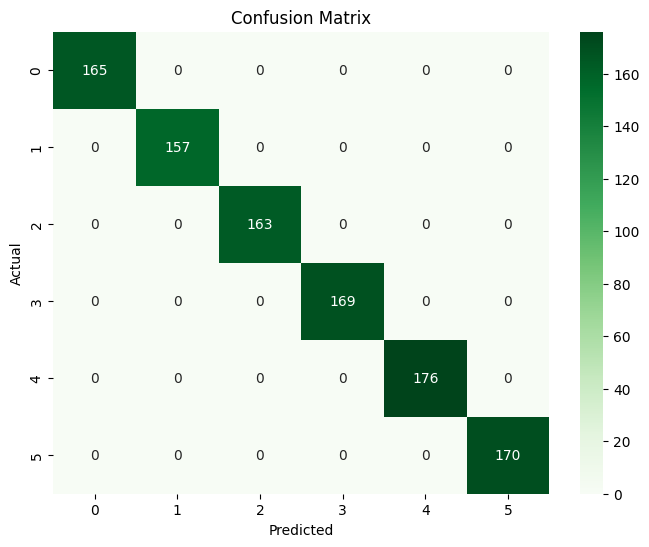

In [11]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Hertzsprung–Russell Diagram

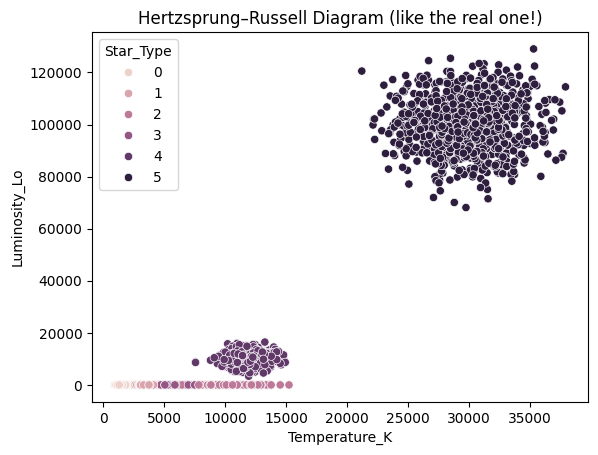

In [12]:
sns.scatterplot(data=df, x='Temperature_K', y='Luminosity_Lo', hue='Star_Type')
plt.title("Hertzsprung–Russell Diagram (like the real one!)")
plt.show()


4.FINAL PREDICTION ON VALIDATION DATASET

In [13]:
# Load datasets
train_df = pd.read_csv("C:\\Users\\sathw\\Downloads\\train_test_dataset.csv")
validate_df = pd.read_csv("C:\\Users\\sathw\\Downloads\\validate_dataset.csv")

# Drop unnecessary column if exists
train_df = train_df.drop(columns=['S.No.'], errors='ignore')
validate_df = validate_df.drop(columns=['S.No.'], errors='ignore')

# Fill missing values 
for col in ['Spectral_Class', 'Star_Color']:
    mode_value = train_df[col].mode()[0]
    train_df[col] = train_df[col].fillna(mode_value)
    validate_df[col] = validate_df[col].fillna(mode_value)

median_temp = train_df['Temperature_K'].median()
train_df['Temperature_K'] = train_df['Temperature_K'].fillna(median_temp)
validate_df['Temperature_K'] = validate_df['Temperature_K'].fillna(median_temp)

# Label encode with combined fit (safe for unseen categories)
le_color = LabelEncoder()
le_spectral = LabelEncoder()

combined_colors = pd.concat([train_df['Star_Color'], validate_df['Star_Color']])
combined_spectral = pd.concat([train_df['Spectral_Class'], validate_df['Spectral_Class']])

le_color.fit(combined_colors)
le_spectral.fit(combined_spectral)

train_df['Star_Color'] = le_color.transform(train_df['Star_Color'])
validate_df['Star_Color'] = le_color.transform(validate_df['Star_Color'])

train_df['Spectral_Class'] = le_spectral.transform(train_df['Spectral_Class'])
validate_df['Spectral_Class'] = le_spectral.transform(validate_df['Spectral_Class'])

# Prepare training data
X = train_df.drop(columns=['Star_Type'])
y = train_df['Star_Type']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
validate_scaled = scaler.transform(validate_df)

# model already trained earlier:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X_scaled, y)

# Predict on validation dataset
validate_predictions = model.predict(validate_scaled)

# Save prediction results
original_validate_df = pd.read_csv("C:\\Users\\sathw\\Downloads\\validate_dataset.csv")

# Add predictions to original
original_validate_df["Predicted_Star_Type"] = validate_predictions
original_validate_df.to_csv("C:\\Users\\sathw\\Downloads\\prediction_22123032.csv", index=False)
print("Final prediction file saved: prediction_22123032.csv")


Final prediction file saved: prediction_22123032.csv


5.EVALUATION METRICS

In [14]:
# Make Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Precision
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

# Recall
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')

# F1 Score
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# F2 Score (more weight on recall)
f2_macro = fbeta_score(y_test, y_pred, average='macro', beta=2)
f2_weighted = fbeta_score(y_test, y_pred, average='weighted', beta=2)

#  Print Metrics 
print("\n Evaluation Metrics:")
print(f"Precision (Macro):    {precision_macro:.4f}")
print(f"Precision (Weighted): {precision_weighted:.4f}")
print(f"Recall (Macro):       {recall_macro:.4f}")
print(f"Recall (Weighted):    {recall_weighted:.4f}")
print(f"F1-Score (Macro):     {f1_macro:.4f}")
print(f"F1-Score (Weighted):  {f1_weighted:.4f}")
print(f"F2-Score (Macro):     {f2_macro:.4f}")
print(f"F2-Score (Weighted):  {f2_weighted:.4f}")

# Full Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0000

 Evaluation Metrics:
Precision (Macro):    1.0000
Precision (Weighted): 1.0000
Recall (Macro):       1.0000
Recall (Weighted):    1.0000
F1-Score (Macro):     1.0000
F1-Score (Weighted):  1.0000
F2-Score (Macro):     1.0000
F2-Score (Weighted):  1.0000

 Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       165
           1     1.0000    1.0000    1.0000       157
           2     1.0000    1.0000    1.0000       163
           3     1.0000    1.0000    1.0000       169
           4     1.0000    1.0000    1.0000       176
           5     1.0000    1.0000    1.0000       170

    accuracy                         1.0000      1000
   macro avg     1.0000    1.0000    1.0000      1000
weighted avg     1.0000    1.0000    1.0000      1000

[[165   0   0   0   0   0]
 [  0 157   0   0   0   0]
 [  0   0 163   0   0   0]
 [  0   0   0 169   0   0]
 [  0   0   0   0 176   0]
 [  0   0   0   0   0 170]

6.HYPERPARAMETER TUNING WITH GRIDSEARCHCV

In [15]:

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# Create base model
rf = RandomForestClassifier(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=1)
                           
# Fit to training data
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

print("Best Parameters:")
print(grid_search.best_params_)

# Optional: Evaluate on test set
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy on Test Set: {accuracy_best:.4f}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Model Accuracy on Test Set: 1.0000


7.DEPLOYMENT USING SIMPLE UI (STREAMLIT)

In [16]:
import joblib

# Save model and preprocessing tools
joblib.dump(model, 'star_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le_color, 'le_color.pkl')
joblib.dump(le_spectral, 'le_spectral.pkl')


['le_spectral.pkl']